In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
#procesamiento de datos
time_series = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print ("time_series:",time_series)
train_size =int(len(time_series)*0.6)
train_data, test_data = time_series[:train_size], time_series[train_size:]
print ("train_data:",train_data)
print ("test_data:",test_data)

time_series: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data: [10 11 12 13 14 15]


In [4]:
#preparacion de datos
def create_dataset (data , seq_lenght):
  X,y = [],[]
  for i in range(len(data)-seq_lenght):
    X.append(data[i:i + seq_lenght])
    y.append(data[i+seq_lenght])
  return np.array(X), np.array(y)

#definimos el numero de pasos de tiempo para la serie
seq_lenght = 4
X_train, y_train = create_dataset(train_data, seq_lenght)
X_test, y_test = create_dataset(test_data, seq_lenght)


#imprimimos los conjuntos
print ("conjunto de secuencias entrenamiento \n",X_train)
print ("Etiquetas de entrenamiento \n",y_train)
print ("conjunto de secuencias prueba \n",X_test)
print ("Etiqueta de prueba \n",y_test)


conjunto de secuencias entrenamiento 
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento 
 [5 6 7 8 9]
conjunto de secuencias prueba 
 [[10 11 12 13]
 [11 12 13 14]]
Etiqueta de prueba 
 [14 15]


In [5]:
#paso 3 construccion del modelo

model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length,1)))
model.add(Dense(1))

# compilar el modelo
model.compile(optimizer='adam', loss='mse')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 84.1321
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 82.9486
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 81.7931
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 80.6427
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 79.5086
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 78.3911
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 77.2903
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 76.2060
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 75.1332
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 74.0753
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 73.0409
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 72.0244
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 71.0321
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 70.0536
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 69.1038
Epoch 

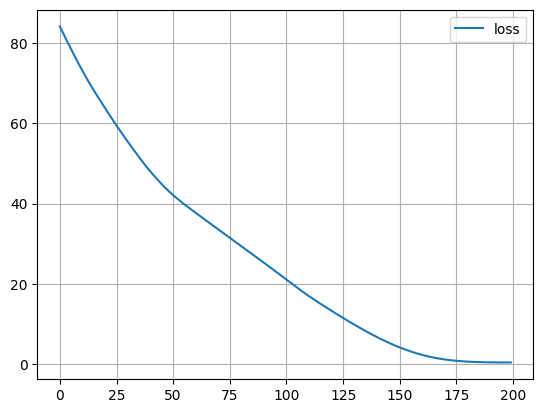

In [6]:
#entrenar el modelo
history = model.fit(X_train, y_train, epochs=200)

#graficar el modelo

pd.DataFrame(history.history).plot(grid=True)
plt.show()

#

In [7]:
#evaluacion del modelo

evaluacion=model.evaluate(X_test,y_test)
print("evaluacion del modelo",evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 8.1653
evaluacion del modelo 8.165287017822266


In [9]:
#prediccion

print("X_test :\n",X_test)
print("y_test :\n",y_test)
y_pred =model.predict(X_test)
print ("y_pred: \n",y_pred)
#

X_test :
 [[10 11 12 13]
 [11 12 13 14]]
y_test :
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
y_pred: 
 [[16.647108]
 [18.053425]]
